# LSTM Spam Detection

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [2]:
!nvidia-smi -L

GPU 0: GeForce RTX 2080 Ti (UUID: GPU-3cb47403-efa9-71ae-1700-c27de6cb0d0a)


In [3]:
df = pd.read_csv('data/spam.csv', encoding='ISO-8859-1')
df = df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)
df.head()

X = df['v2'].to_numpy()
y = df['v1'].map({'ham': 0, 'spam': 1}).to_numpy()
X_train_texts, X_test_texts, y_train, y_test = train_test_split(X, y, test_size=0.33)

MAX_VOCAB_SIZE = 20000
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(X_train_texts)
X_train = tokenizer.texts_to_sequences(X_train_texts)
X_test = tokenizer.texts_to_sequences(X_test_texts)

X_train = tf.keras.preprocessing.sequence.pad_sequences(X_train)
T = X_train.shape[1]
X_test = tf.keras.preprocessing.sequence.pad_sequences(X_test, maxlen=T)

V = len(tokenizer.word_index)
D = 20
M = 15

Train on 3733 samples, validate on 1839 samples
Epoch 1/10
3733/3733 [==============================] - 4s 1ms/sample - loss: 0.4667 - accuracy: 0.8647 - val_loss: 0.3556 - val_accuracy: 0.8684
Epoch 2/10
3733/3733 [==============================] - 1s 261us/sample - loss: 0.3164 - accuracy: 0.8647 - val_loss: 0.2677 - val_accuracy: 0.8684
Epoch 3/10
3733/3733 [==============================] - 1s 262us/sample - loss: 0.2200 - accuracy: 0.8728 - val_loss: 0.1727 - val_accuracy: 0.9570
Epoch 4/10
3733/3733 [==============================] - 1s 260us/sample - loss: 0.1141 - accuracy: 0.9893 - val_loss: 0.0982 - val_accuracy: 0.9848
Epoch 5/10
3733/3733 [==============================] - 1s 287us/sample - loss: 0.0607 - accuracy: 0.9957 - val_loss: 0.0779 - val_accuracy: 0.9859
Epoch 6/10
3733/3733 [==============================] - 1s 272us/sample - loss: 0.0379 - accuracy: 0.9979 - val_loss: 0.0649 - val_accuracy: 0.9880
Epoch 7/10
3733/3733 [==============================] - 1s 262us/s

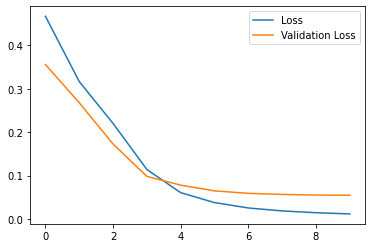

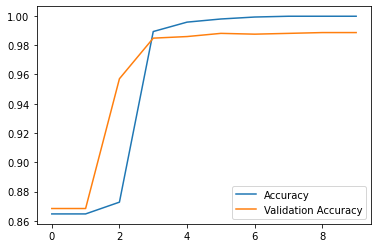

1839/1839 [==============================] - 0s 108us/sample - loss: 0.0549 - accuracy: 0.9886
Accuracy: 0.9885807633399963


In [4]:
i = tf.keras.layers.Input(shape=(T,))
x = tf.keras.layers.Embedding(V + 1, D)(i)
x = tf.keras.layers.LSTM(M, return_sequences=True)(x)
x = tf.keras.layers.GlobalMaxPool1D()(x)
x = tf.keras.layers.Dense(1, activation='sigmoid')(x)   
model = tf.keras.models.Model(i, x)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

r = model.fit(X_train, y_train,
              validation_data=(X_test, y_test),
              epochs=10)

plt.plot(r.history.get('loss'), label='Loss')
plt.plot(r.history.get('val_loss'), label='Validation Loss')
plt.legend()
plt.show()

plt.plot(r.history.get('accuracy'), label='Accuracy')
plt.plot(r.history.get('val_accuracy'), label='Validation Accuracy')
plt.legend()
plt.show()

print(f'Accuracy: {model.evaluate(X_test, y_test)[1]}')

## Display a misclassified sentence

In [5]:
labels = ['Ham', 'Spam']
p_test = np.rint(model.predict(X_test).flatten()).astype(np.int)
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
print(f'Sentence: {X_test_texts[i]}')
print(f'Truth: {labels[y_test[i]]}\nPredicted: {labels[p_test[i]]}')

Sentence: accordingly. I repeat, just text the word ok on your mobile phone and send
Truth: Spam
Predicted: Ham
